<a href="https://colab.research.google.com/github/ummadiviany/MachineLearning/blob/master/MNIST_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
from keras.preprocessing.image import ImageDataGenerator


Mounted at /content/gdrive


In [0]:
batch_size = 128
num_classes = 10
epochs = 5

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()



In [0]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)



In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
datagen.fit(x_train)
train_iterator = datagen.flow(x_train, y_train, batch_size=128)
test_iterator = datagen.flow(x_test, y_test, batch_size=128)
'''x_train /= 255
x_test /= 255
x_train=2*x_train-1
x_test=2*x_test-1'''
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

#history=model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
history=model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), epochs=5)

Epoch 1/5
938/938 [==============================] - 15s 16ms/step - loss: 0.1767 - acc: 0.9461
Epoch 2/5
938/938 [==============================] - 14s 15ms/step - loss: 0.0672 - acc: 0.9802
Epoch 3/5
938/938 [==============================] - 14s 15ms/step - loss: 0.0515 - acc: 0.9850
Epoch 4/5
938/938 [==============================] - 14s 15ms/step - loss: 0.0431 - acc: 0.9870
Epoch 5/5
938/938 [==============================] - 14s 14ms/step - loss: 0.0377 - acc: 0.9883


In [0]:
#score = model.evaluate(x_test, y_test, verbose=0)
_, acc = model.evaluate_generator(test_iterator, steps=len(test_iterator), verbose=0)
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])
print('Test Accuracy: %.3f' % (acc * 100))
model.save('/content/gdrive/My Drive/mnist/normstd.h5')

Test Accuracy: 99.040


dict_keys(['loss', 'acc'])


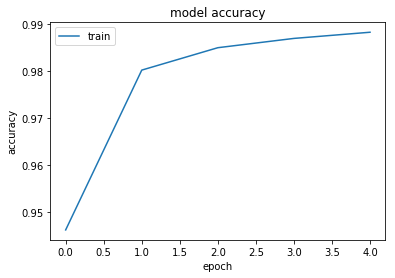

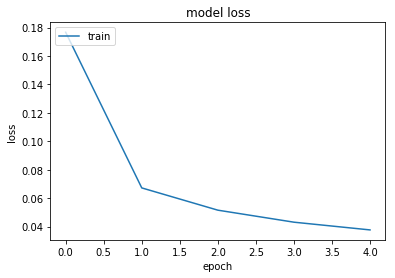

In [0]:
print(history.history.keys())
import matplotlib.pyplot as plt
fig = plt.figure()

# summarize history for accuracy
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
fig.savefig('/content/gdrive/My Drive/mnist/normstd_acc.png')
plt.show()
# summarize history for loss
fig1=plt.figure()
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
fig1.savefig('/content/gdrive/My Drive/mnist/normstd_loss.png')
plt.show()